# Cp

In [9]:
import pandas as pd
comentarios = list(pd.read_csv('C:/Users/santi/OneDrive/Escritorio/Javeriana/Semillero/prueba_semillero/archive/spanish_tweets_suggesting_signs_of_depression_v1.csv')[ 'TWEET_TEXT'])
#!pip install pyspellchecker #Diccionario en español
#!pip install spacy #Libreria para entender el lenguaje
#!python -m spacy download es_core_news_lg
import spacy
from spellchecker import SpellChecker
import string
import time

# Carga del modelo de spaCy para español
nlp = spacy.load('es_core_news_lg')

# Inicialización del corrector ortográfico en español
spell = SpellChecker(language='es')
def normalizacion(comentarios, correcion_ortografia, lematizacion, stopwords, caracteres_especiales, signos_de_puntuacion, numeros, eliminar_palabras, minuscula, hashtags):
  comentarios_procesados = []

  inicio_funcion = time.time()
  iteration = 0
  for comentario in comentarios:
    if minuscula:
      comentario = comentario.lower()
    if hashtags:
      comentario = " ".join([palabra for palabra in comentario.split() if not palabra.startswith('#')])

    comentario = " ".join([palabra for palabra in comentario.split() if not palabra.startswith('#')])
    # Corrección ortográfica
    if correcion_ortografia:
      #comentario = " ".join([spell.correction(palabra) for palabra in comentario.split()])
      comentario = " ".join([spell.correction(palabra) if spell.correction(palabra) is not None else palabra for palabra in comentario.split()])


    # Procesamiento con spaCy (tokenización)
    doc = nlp(comentario)

    # Filtrado de tokens
    tokens_filtrados = doc
    if stopwords:
      tokens_filtrados = [token for token in tokens_filtrados if not token.is_stop]
    if signos_de_puntuacion:
      tokens_filtrados = [token for token in tokens_filtrados if not token.is_punct]
    if numeros:
      tokens_filtrados = [token for token in tokens_filtrados if not token.like_num]
    if eliminar_palabras:
      tokens_filtrados = [token for token in tokens_filtrados if token.text.lower() not in eliminar_palabras]

    # Lematización o uso de texto original del token
    if lematizacion:
      palabras_procesadas = [token.lemma_ for token in tokens_filtrados]
    else:
      palabras_procesadas = [token.text for token in tokens_filtrados]

    # Eliminación de caracteres especiales y normalización de texto
    if caracteres_especiales:
      palabras_procesadas = [palabra.translate(str.maketrans('', '', string.punctuation)) for palabra in palabras_procesadas]

    palabras_procesadas = [palabra.strip() for palabra in palabras_procesadas if palabra.strip()]

    # Uniendo las palabras procesadas en un comentario normalizado
    comentario_normalizado = " ".join(palabras_procesadas)
    comentarios_procesados.append(comentario_normalizado)
    iteration += 1

    # Tiempos de procesamientto
    if iteration == round(len(comentarios)*0.25,1):
      medio_tiempo = time.time()
      print(f"Va por el 25% ({iteration} comentarios procesados) con un tiempo de {round(medio_tiempo-inicio_funcion,3)} segundos.")
    if iteration == round(len(comentarios)*0.5,1):
      medio_tiempo = time.time()
      print(f"Va por el 50% ({iteration} comentarios procesados) con un tiempo de {round(medio_tiempo-inicio_funcion,3)} segundos.")
    if iteration == round(len(comentarios)*0.75,1):
      medio_tiempo = time.time()
      print(f"Va por el 75% ({iteration} comentarios procesados) con un tiempo de {round(medio_tiempo-inicio_funcion,3)} segundos.")
  fin_funcion = time.time()
  print(f"Para procesar {len(comentarios)} comentarios se demoró un tiempo total de: {round(fin_funcion-inicio_funcion,3)} segundos")

  return comentarios_procesados


cp = normalizacion(comentarios, correcion_ortografia = True, lematizacion = False, stopwords = True, caracteres_especiales = True, signos_de_puntuacion = True, numeros = True, eliminar_palabras = ['external_link'], minuscula = True, hashtags = True )

corpus = ". ".join(cp)

Va por el 25% (250 comentarios procesados) con un tiempo de 34.725 segundos.
Va por el 50% (500 comentarios procesados) con un tiempo de 57.148 segundos.
Va por el 75% (750 comentarios procesados) con un tiempo de 82.338 segundos.
Para procesar 1000 comentarios se demoró un tiempo total de: 107.931 segundos


# Funcion para extraccion de keywords

In [ ]:
def keys_set():


# Rake


In [10]:
#!pip install rake-nltk

In [11]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
def rake(corpus,num_words):
    # Se tiene que instalar esto antes de poder usar la función :D
    #!pip install rake-nltk si no está instalado
    from rake_nltk import Rake
    #import nltk
    #nltk.download('stopwords')
    #nltk.download('punkt')

    r = Rake()

    # Extraer palabras clave
    r.extract_keywords_from_text(corpus)

    # Obtener frases clave ordenadas


    # Obtener palabras clave con sus puntuaciones
    keywords_with_scores = r.get_word_degrees()

    # Ordenar las palabras clave por su puntuación (importancia)
    sorted_keywords = sorted(keywords_with_scores.items(), key=lambda x: x[1], reverse=True)

    return [key[0] for key in sorted_keywords[:num_words]]

rake(corpus,10)



['quiero',
 'siento',
 'ganas',
 'mierda',
 'vida',
 'llorar',
 'ansiedad',
 'depresión',
 'dormir',
 'odio']

In [76]:
# Suponiendo que tu_lista es una lista de tuplas, donde cada tupla contiene una frase en el índice 0
tu_lista = [('frase uno con cinco palabras', 660), ('otra frase', 507), ...]

# Extraer palabras hasta alcanzar un total de 10
palabras = []
for elemento in tu_lista:
    if isinstance(elemento, tuple) and len(elemento) > 1:
        frase = elemento[0]
        for palabra in frase.split():
            if len(palabras) < 10:
                palabras.append(palabra)
            else:
                break
        if len(palabras) >= 10:
            break

print(palabras)

['frase', 'uno', 'con', 'cinco', 'palabras', 'otra', 'frase']


# Yake

In [14]:
#!pip install yake

In [124]:
def yake(corpus,num_words):
    import yake

    # Configuración del idioma y número máximo de palabras clave
    language = "es"
    max_ngram_size = 1

    # Crear una instancia de Yake con la configuración deseada
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_words)

    # Extraer palabras clave con sus respectivos pesos
    keywords = custom_kw_extractor.extract_keywords(corpus)

    return [key[0] for key in keywords]

yake(corpus,10)

['quiero',
 'siento',
 'ganas',
 'vida',
 'mierda',
 'llorar',
 'dormir',
 'depresión',
 'odio',
 'ansiedad']

# MultiPartiteRank

In [17]:
#pip install git+https://github.com/boudinfl/pke.git

In [134]:
import pke

# Inicializar el extractor de palabras clave MultiPartiteRank
extractor = pke.unsupervised.MultipartiteRank()

# Definir el texto del cual quieres extraer palabras clave


# Cargar el texto en el extractor y especificar el idioma
extractor.load_document(input=corpus, language="es")

# Extraer las palabras clave
extractor.candidate_selection()
extractor.candidate_weighting()

# Obtener las 10 palabras clave más importantes y sus pesos
palabras_clave = extractor.get_n_best(n=12)

# Imprimir las palabras clave y sus pesos
for palabra, peso in palabras_clave:
    print(f"{palabra}: {peso}")


vida sentido ganas: 0.030522038769723578
ganas: 0.02841319154620184
mierda: 0.01940059134407669
depresión: 0.015343077817821162
cansada: 0.015119028888093454
mundo: 0.014411221806767332
vida: 0.013387489471956789
cosas: 0.013374387308229362
tiempo: 0.011343012613656162
malas personas: 0.009581139075078803
odio: 0.008959594632098949
vacío: 0.00870010156849694


In [19]:
key_multipartiteRank = ["ganas","mierda","depresion","cansada","mundo","vida","cosas","tiempo","odio","vacio"]

# TopicRank

In [20]:
#!pip install git+https://github.com/boudinfl/pke.git
#!python -m nltk.downloader stopwords
#!python -m nltk.downloader universal_tagset
#!python -m spacy download es_core_news_lg # Para el español

In [133]:
def topicrank(corpus,num_words):
    #Instalar si no lo tiene instalado :)
    #!pip install git+https://github.com/boudinfl/pke.git
    #!python -m nltk.downloader stopwords
    #!python -m nltk.downloader universal_tagset
    #!python -m spacy download es_core_news_lg # Para el español
    import pke

    # Inicializar TopicRank
    extractor = pke.unsupervised.TopicRank()

    # Cargar tu texto en español
    extractor.load_document(input=corpus, language='es')

    # Seleccionar candidatos a palabras clave
    extractor.candidate_selection()

    # Ponderar los candidatos
    extractor.candidate_weighting()

    # Obtener las 10 palabras clave más importantes
    palabras_clave = extractor.get_n_best(n=num_words)

    return [key[0] for key in palabras_clave]
    # Imprimir las palabras clave y sus pesos

topicrank(corpus,10)



['vida sentido ganas',
 'ganas',
 'mierda',
 'cansada',
 'cosas',
 'depresión',
 'tiempo',
 'triste',
 'mundo',
 'vacío']

In [22]:
key_topicrank = ["ganas","mierda","cansada","cosas","depresion","tiempo","triste","mundo","vacio","noche"]

# TFIDF

In [23]:
#!pip install scikit-learn
#!pip install nltk
#!python -c "import nltk; nltk.download('stopwords')"

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords

# Lista de stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Tu texto en español
documentos = cp

# Inicializar el vectorizador TF-IDF con stopwords en español
vectorizador = TfidfVectorizer(stop_words=spanish_stopwords)

# Transformar los documentos en una matriz TF-IDF
X = vectorizador.fit_transform(documentos)

# Obtener las puntuaciones de cada palabra en el documento
scores = np.array(X.sum(axis=0)).ravel()

# Mapear puntuaciones con palabras
palabras = np.array(vectorizador.get_feature_names_out())

# Ordenar las palabras por sus puntuaciones
palabras_clave = sorted(zip(palabras, scores), key=lambda x: -x[1])[:10]

# Imprimir las 10 palabras clave más importantes y sus pesos
for palabra, peso in palabras_clave:
    print(f"Palabra clave: {palabra}, Peso: {peso}")


Palabra clave: siento, Peso: 43.821126921473876
Palabra clave: mierda, Peso: 33.316545726086545
Palabra clave: quiero, Peso: 32.7905875732241
Palabra clave: vida, Peso: 31.97880655385013
Palabra clave: ganas, Peso: 27.470149930846837
Palabra clave: llorar, Peso: 19.7235001406125
Palabra clave: dormir, Peso: 18.54204600104366
Palabra clave: cansada, Peso: 16.06518469015345
Palabra clave: odio, Peso: 14.794990480426705
Palabra clave: depresión, Peso: 13.584657743665495


In [25]:
key_tfidf = ["siento","mierda","quiero","vida","ganas","llorar","dormir","cansada","odio","depresion"]

# SET

In [26]:
key=list(set(key_rake+key_yake+key_multipartiteRank+key_topicrank+key_tfidf))

key

['dormir',
 'noche',
 'depresión',
 'ansiedad',
 'llorar',
 'mundo',
 'tiempo',
 'quiero',
 'cansada',
 'ganas',
 'odio',
 'depresion',
 'cosas',
 'vacio',
 'triste',
 'siento',
 'vida',
 'mierda']

In [27]:
import pandas as pd



# Crear un diccionario para almacenar los datos
data = {}

# Llenar el diccionario con los datos
for elemento in key:
    data[elemento] = [('1' if elemento in lista else '0') for lista in [key_rake,key_yake , key_multipartiteRank,key_topicrank,key_tfidf]]

# Crear el DataFrame
df = pd.DataFrame(data, index=['key_rake','key_yake ', 'key_multipartiteRank','key_topicrank','key_tfidf'])

df

,dormir,noche,depresión,ansiedad,llorar,mundo,tiempo,quiero,cansada,ganas,odio,depresion,cosas,vacio,triste,siento,vida,mierda
key_rake,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,1,1
key_yake,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,1,1
key_multipartiteRank,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1
key_topicrank,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1
key_tfidf,1,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1


In [28]:
df.to_csv('key.csv')

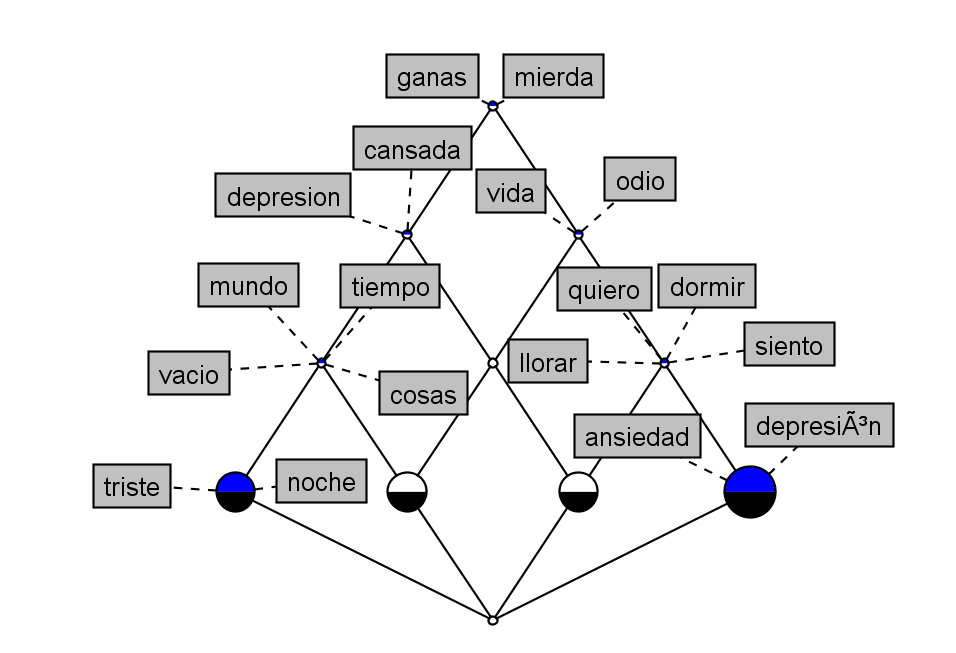

# Palabras similares

In [31]:
corpus

'deberían eliminar malas personas odiamos vivir mundo. deja intentar contarle problemas alguien entiende importas. tristeza fácil ocultar sentimientos trae depresión. peores cosas depresión deja ganas vivir matarte agonizando. soledad único constante vida conoceré amor amistad felicidad vivir cansé. quiero desaparecer tiempo quisiera alguien diera infierno vivo. madre enferma flojera narcolepsia consumiendo depresión. vida sentido ganas irme mundo fiesta. cansé gorda cansé fracaso cansé quiero irmeeeeeeeee. cálculos debería muerta. odio sentirme incómoda rodeada gente odio sentirme insegura gente mira. ganas morir. raro siente neutro triste feliz estás sentir. tóxica pongo pensar cosas imagino situaciones ponerme doy pelotuda. paso empiezan sentir triste sentis vacío llenar. necesito atención contención constante estabilidad mental emocional paja relacionarse. ultimamente estabilidad emocional inestable clima otoño encantaría botón digas. feo juntan problemas estrés ansiedad depresión 

In [48]:
# Importar las bibliotecas necesarias
from transformers import BertTokenizer, BertModel
import torch

# Cargar el tokenizer y el modelo preentrenado
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Texto de ejemplo en español
text = " ".join(cp)

# Tokenizar el texto
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Obtener los embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Los embeddings del último layer
last_hidden_states = outputs.last_hidden_state

# Mapear tokens a palabras
tokenized_text = tokenizer.tokenize(text)
for i, token_str in enumerate(tokenized_text):
    print(f"Token: {token_str}")
    print(f"Embedding: {last_hidden_states[0][i]}")
    print("")


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Token: deberían
Embedding: tensor([-2.0064e-01, -2.0444e-01,  1.0834e-01,  2.2217e-01, -7.7329e-03,
         2.4635e-01, -2.5294e-01, -4.6328e-01,  3.3018e-01, -5.6089e-01,
         7.0691e-01, -8.3971e-01,  4.3993e-01,  5.2707e-01, -3.5032e-02,
        -1.5659e-01,  7.3285e-01, -4.6754e-01, -3.7460e-01,  6.6000e-01,
        -2.8750e-02,  6.8628e-01,  2.0660e-01, -5.2049e-01,  2.2638e-01,
        -3.6840e-01, -1.5861e-01,  4.8051e-01, -4.7591e-01, -2.2645e-01,
        -1.2309e-01,  2.0509e-01, -6.7797e-01,  3.9826e-01, -3.9352e-01,
        -3.1125e-01,  2.4909e-01, -6.5308e-02,  3.9142e-01, -7.5464e-02,
         1.6709e-01, -1.0707e-01, -2.8347e-01,  2.6425e-01, -5.7601e-01,
        -2.8859e-01, -4.4673e-01, -2.6828e-01,  1.2017e+00,  6.8063e-01,
         1.3888e+00, -8.5893e-01, -1.2650e-02, -5.0593e-01, -3.3764e-01,
         3.3806e-01, -7.8106e-01, -3.2152e-01, -4.6740e-01,  1.7035e-01,
        -2.4261e-02,  4.9357e-01, -7.1627e-01, -5.7803e-01,  1.8237e-01,
        -1.0402e-01, -1.

IndexError: index 128 is out of bounds for dimension 0 with size 128

In [35]:
i1 =  tokenized_text.index('mierda')
i2 =  tokenized_text.index('ganas')

In [53]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_lg')

# Obtener el vector de una palabra
palabra = nlp('ganas')
#print(palabra.vector)



# Buscar palabras similares
palabras_similares = []
for palabra_similar in nlp.vocab:
    if palabra_similar.has_vector and palabra_similar.is_lower and palabra_similar.lower_ != palabra.text:
        similitud = palabra.similarity(palabra_similar)
        palabras_similares.append((palabra_similar.text, similitud))

# Ordenar por similitud
palabras_similares = sorted(palabras_similares, key=lambda item: item[1], reverse=True)

# Mostrar las palabras más similares
for palabra, similitud in palabras_similares[:10]:  # Cambiar el 10 por la cantidad de palabras que desees ver
    print(palabra, similitud)

pa 0.29540467508469037
q 0.2856520990552079
k 0.18909477245090187
dna 0.17285374407388754
:o) 0.1517607750146512
a 0.14671431741353924
y 0.10627769173022773
q. 0.10414856850841292
:p 0.09745969820217451
y. 0.08862274831944993


# n-gramas

In [61]:
import nltk
from nltk import bigrams, trigrams
from collections import Counter

nltk.download('punkt')

def procesar_palabras_clave(comentarios, palabras_clave):
    conteo_bigramas = Counter()
    conteo_trigramas = Counter()

    for palabra_clave in palabras_clave:
        # Procesar cada comentario
        for comentario in comentarios:
            tokens = nltk.word_tokenize(comentario.lower())

            # Bigramas
            for i in range(len(tokens)-1):
                if tokens[i] == palabra_clave or tokens[i+1] == palabra_clave:
                    conteo_bigramas[(tokens[i], tokens[i+1])] += 1

            # Trigramas
            for tri in trigrams(tokens):
                if palabra_clave in tri:
                    conteo_trigramas[tri] += 1

    # Mostrar los bigramas más comunes en general
    print("\nBigramas más comunes en general: \n")
    for bigrama, frecuencia in conteo_bigramas.most_common(10):
        print(f"{bigrama}: {frecuencia}")
        

    # Mostrar los trigramas más comunes en general
    print("\nTrigramas más comunes en general: \n")
    for trigrama, frecuencia in conteo_trigramas.most_common(10):
        print(f"{trigrama}: {frecuencia}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
procesar_palabras_clave(cp, ["ganas","mierda"])



Bigramas más comunes en general: 

('ganas', 'morirme'): 13
('vida', 'mierda'): 9
('ganas', 'llorar'): 8
('ganas', 'morir'): 6
('ganas', 'dormir'): 6
('ganas', 'vivir'): 4
('ganas', 'cortarme'): 4
('mierda', 'vida'): 4
('puta', 'mierda'): 4
('ganas', 'matarme'): 3

Trigramas más comunes en general: 

('ganas', 'mandar', 'mierda'): 2
('sacar', 'ganas', 'morirme'): 2
('ganas', 'morir', 'mierda'): 2
('iniciando', 'semana', 'ganas'): 2
('semana', 'ganas', 'morirme'): 2
('ganas', 'morirme', 'perder'): 2
('depresión', 'deja', 'ganas'): 1
('deja', 'ganas', 'vivir'): 1
('ganas', 'vivir', 'matarte'): 1
('vida', 'sentido', 'ganas'): 1
